In [30]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def img_plt(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# Create the dimensions of the figure and set title and color:
fig = plt.figure(figsize=(15, 7))
plt.suptitle("Adaptive thresholding with a bilateral filter (noise removal while edges sharp)", fontsize=14)
plt.rcParams['figure.facecolor'] = 'silver'

<Figure size 1080x504 with 0 Axes>

In [32]:
# Load the image and convert it to grayscale:
image = cv2.imread("images/sudoku.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Apply a bilateral filter in order to reduce noise while keeping the edges sharp:

In [33]:
gray_image = cv2.bilateralFilter(gray_image, 15, 25, 25)

In [34]:
#Calculating adaptive thresholding with different parameters:

thresh1 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
thresh3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
thresh4 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 3)

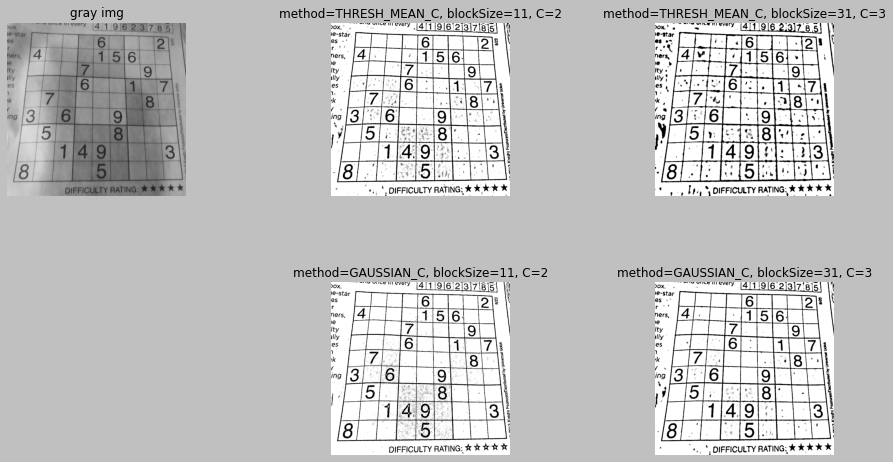

In [35]:
#Plot the thresholded images:
img_plt(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray img", 1)
img_plt(cv2.cvtColor(thresh1, cv2.COLOR_GRAY2BGR), "method=THRESH_MEAN_C, blockSize=11, C=2", 2)
img_plt(cv2.cvtColor(thresh2, cv2.COLOR_GRAY2BGR), "method=THRESH_MEAN_C, blockSize=31, C=3", 3)
img_plt(cv2.cvtColor(thresh3, cv2.COLOR_GRAY2BGR), "method=GAUSSIAN_C, blockSize=11, C=2", 5)
img_plt(cv2.cvtColor(thresh4, cv2.COLOR_GRAY2BGR), "method=GAUSSIAN_C, blockSize=31, C=3", 6)

plt.subplots_adjust(top=3,bottom=1.5, right=2.3, left=0.3, wspace=0.5, hspace=0.5)
plt.show()
